### Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

 - Has the network latency gone up since we switched internet service providers?

- $H_{0}$ = Network latency has no effect on switching internet service providers
- $H_{a}$ = Network latency has gone up since switching internet service providers
- true_pos = alpha > p value, we establish that internet service does impact latency
- true_neg = alpha < p, we establish that internet service has no impact on latency
- type1_error = we reject that internet service has no impact on latency but the truth is there is no impact
- type2_error = we don't reject that internet service has no impact on latency but there is significant impact why?

- Is the website redesign any good?

- $H_{0}$ = The webside design has no impact on total revenue
- $H_{a}$ = The website design has a correlation on total revenue
- true_pos = alpha > p value, we establish website design does affect total revenue
- true_neg = alpha < p, we establish that website design has no impact on revenue
- type1_error = we reject that website design has no impact on revenue but the truth is there is no impact
- type2_error = we don't reject that website design has no impact on revenue but there is significant impact, why?

- Is our television ad driving more sales?

- $H_{0}$ = Our television ad is not driving sales
- $H_{a}$ = Our television ad is driving more sales
- true_pos = reject null, the ad is driving more sales
- true_neg = accept null, and there is no significance of our ad on sales
- type1_error = we reject null, and say there is a significance of ad on sales and there is actually no significance
- type2_error = we accept that television ad is not driving sales, but actually there is significant impact.

Using the Zillow database:    

- Does square feet affect home value?

- $H_{0}$ = calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt
- $H_{a}$ = calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt
- true_pos = reject $H_{0}$, calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt
- true_neg = accept $H_{0}$, calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt
- type1error = we reject $H_{0}$, we say calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt, and the reality is calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt
- type2error = we accept calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt, but actually calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt

- Do newer homes generally have a larger square footage?

- $H_{0}$ = yearbuit has no impact on taxvaluedollarcnt
- $H_{a}$ = yearbuilt has a significant impact on taxvaluedollarcnt
- true_pos = we reject $H_{0}$, yearbuilt has a significant impact on taxvaluedollarcnt
- true_neg = we accept $H_{0}$, yearbuilt has no effect on taxvaluedollarcnt
- type1_error = we reject $H_{0}$, we say yearbuilt has a significant impact on taxvaluedollarcnt, but in reality it doesn't
- type2_error = we don't reject $H_{0}$, we say yearbuit has no impact on taxvaluedollarcnt, but actually it does.

In [207]:
from math import sqrt
from scipy import stats
from pydataset import data


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import viz
import datetime
import seaborn as sns

### Hypothesis Testing Exercises

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [4]:
# Two different samples, two tailed test
alpha = 0.05

In [5]:
mean1=90
std_dev1=15
nobs1=40
var1=15**(1/2)

mean2=100
std_dev2=20
nobs2=50
var2=20**(1/2)


t, p = stats.ttest_ind_from_stats(mean1, std_dev1, nobs1,
                                 mean2, std_dev2, nobs2, equal_var=False)
t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [6]:
p < alpha

True

In [7]:
if p < alpha: 
    print("Reject the null hypothesis, they are the same")
    print("We move forward with the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis, they are the same
We move forward with the alternative hypothesis


### Load the mpg dataset and use it to answer the following questions:

In [8]:
mpg = data("mpg")
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
112,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize
169,subaru,impreza awd,2.5,1999,4,auto(l4),4,19,26,r,subcompact
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
124,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,19,r,suv
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan


In [9]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
mpg['average_mileage'] = (mpg.hwy + mpg.cty) / 2
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,15.0
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan,20.5
94,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact,20.0
77,ford,expedition 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv,15.0
137,lincoln,navigator 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv,15.0


In [10]:
# set up my variables
fuel99 = mpg[mpg.year==1999].average_mileage
fuel08 = mpg[mpg.year==2008].average_mileage

<AxesSubplot:>

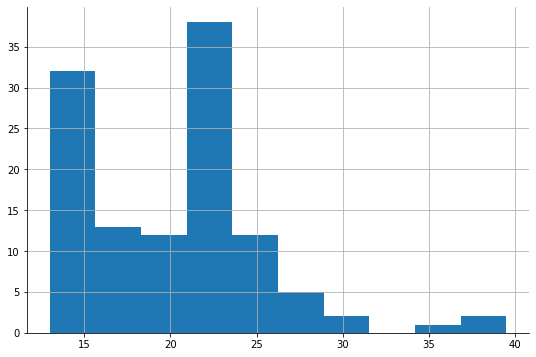

In [11]:
fuel99.hist()

<AxesSubplot:>

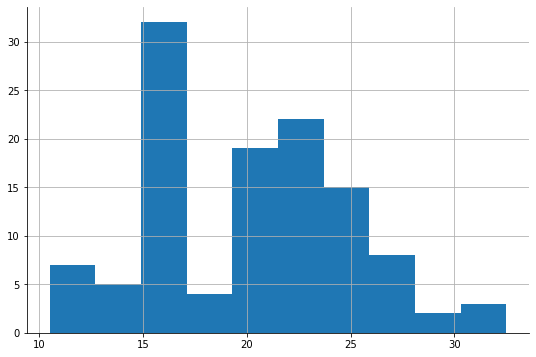

In [12]:
fuel08.hist()

#### set hypothesis
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?\

$H_{0}$: There is no difference in fuel-efficiency in cars from 2008 and 1999.\
$H_{a}$: There is a difference in fuel-efficiency in cars from 2008 and 1999.

In [13]:
fuel99.var(), fuel08.var()

(27.122605363984682, 24.097480106100797)

In [14]:
t, p = stats.ttest_ind(fuel08, fuel99, equal_var=True)

t, p, alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [15]:
if p < alpha: 
    print("Reject the null hypothesis, they are the same")
    print("We move forward with the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### - Are compact cars more fuel-efficient than the average car?

In [16]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
24,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,21.0
79,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv,17.0
61,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv,15.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0
157,pontiac,grand prix,3.8,1999,6,auto(l4),f,17,27,r,midsize,22.0


In [17]:
# set up my variables
compact = mpg[mpg['class'] == 'compact'].average_mileage
all_cars = mpg.average_mileage

<AxesSubplot:>

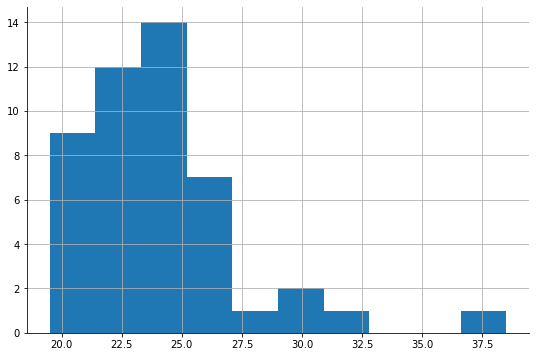

In [18]:
compact.hist()

<AxesSubplot:>

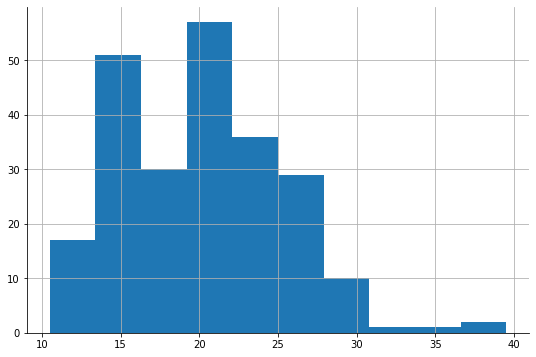

In [19]:
all_cars.hist()

In [20]:
compact.count(), all_cars.count()

(47, 234)

In [21]:
compact.var(), all_cars.var()

(12.442876965772433, 25.50542900113715)

$H_{0}$: Compact cars are not more fuel efficient than the average\
$H_{a}$: Compact cars are more fuel-efficient than the average car

In [22]:
# one sample ttest, 1-tail test
alpha = 0.05
compact = mpg[mpg['class'] == 'compact'].average_mileage
overall_mean = mpg.average_mileage.mean()

t, p = stats.ttest_1samp(compact, overall_mean)
t, p/2, alpha

(7.896888573132535, 2.0992818971585668e-10, 0.05)

In [23]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?

In [24]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
153,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv,17.0
104,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,28.0
61,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv,15.0
175,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv,18.0
132,land rover,range rover,4.2,2008,8,auto(s6),4,12,18,r,suv,15.0


In [25]:
manual = mpg[mpg['trans'].str.startswith('m')].average_mileage
automatic = mpg[mpg['trans'].str.startswith('a')].average_mileage

<AxesSubplot:>

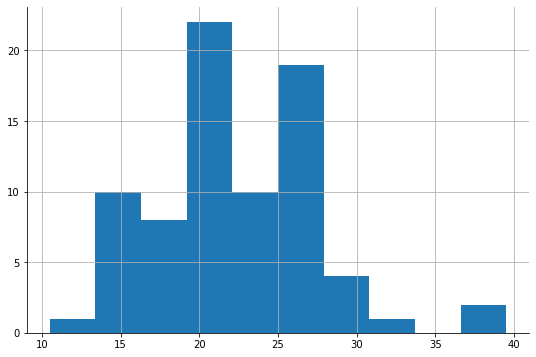

In [26]:
manual.hist()

<AxesSubplot:>

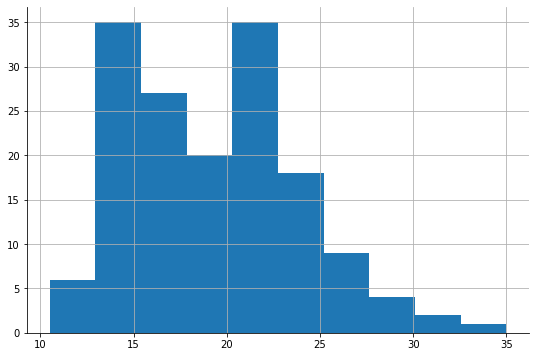

In [27]:
automatic.hist()

In [28]:
manual.count(), automatic.count()

(77, 157)

In [29]:
manual.var(), automatic.var()

(26.635167464114826, 21.942777233382337)

In [30]:
stats.levene(manual, automatic)
# if p < .05 then equal_var=False
# if p > 0.05 then equal_var=True

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [31]:
alpha = 0.05

t, p = stats.ttest_ind(manual, automatic, equal_var=False)

t, p/2, alpha

(4.443514012903071, 8.976124499958965e-06, 0.05)

In [32]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [33]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [34]:
t, p = stats.ttest_ind(automatic, manual, equal_var=True)

t, p/2, alpha

(-4.593437735750014, 3.5771872005728416e-06, 0.05)

### Correlation Exercises

In [71]:
telco = pd.read_csv('Cust_Churn_Telco.csv')
telco = telco.dropna()
telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2273,0219-QAERP,Male,0,Yes,No,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,576.65,No
5265,4274-DRSQT,Female,0,No,No,66,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.90,6000.10,No
2556,8868-GAGIO,Male,0,Yes,No,45,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,84.55,3713.95,No
791,3442-ZHHCC,Male,0,No,No,68,Yes,Yes,DSL,Yes,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),76.90,5023.00,No
3913,8749-TZYEC,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.80,1874.30,No


#### Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [72]:
x = telco.tenure
y = telco.MonthlyCharges

(0.0, 80.0)

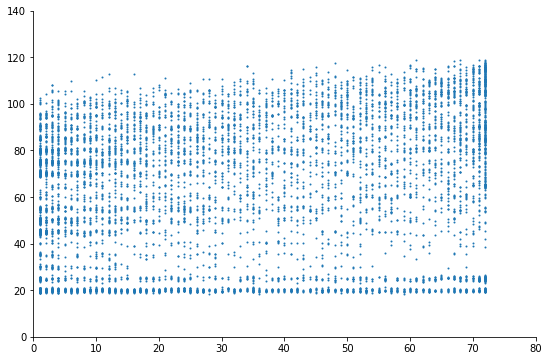

In [73]:
plt.scatter(x, y, s=1)
plt.ylim(0,140) 
plt.xlim(0,80)

In [74]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.2468617666408957, 3.9898213232510553e-98, 0.05)

In [75]:
p < alpha

True

Thus we reject $H_{0}$, there is a correlation between tenure and monthly charges.

#### Does tenure correlate with total charges? 

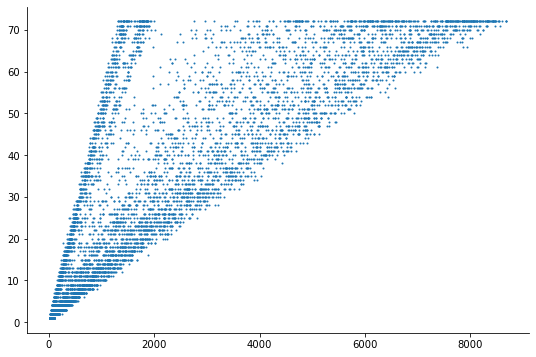

In [76]:
x = telco.TotalCharges
y = telco.tenure
plt.scatter(x, y, s=1)

In [78]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.8258804609332093, 0.0, 0.05)

In [81]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


#### What happens if you control for phone and internet service?

(0.0, 150.0)

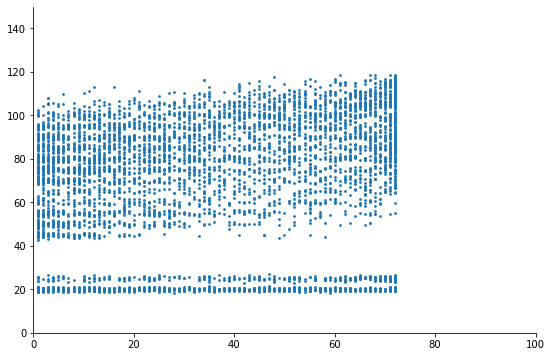

In [105]:
# for customers with phone service
x = telco[telco.PhoneService=='Yes'].tenure
y = telco[telco.PhoneService=='Yes'].MonthlyCharges

plt.scatter(x, y, s=3)
plt.xlim(0,100)
plt.ylim(0,150)

In [95]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.24419396575193372, 6.828016037598485e-87, 0.05)

In [96]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


(0.0, 100.0)

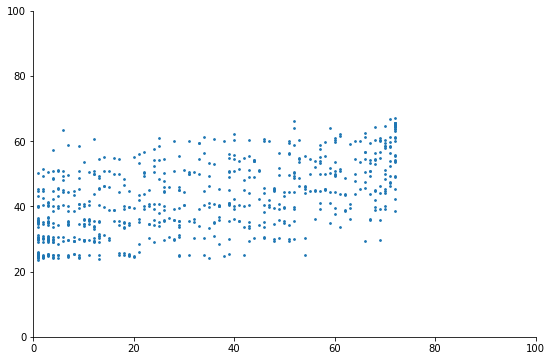

In [107]:
# for customers without phone service
x = telco[telco.PhoneService=='No'].tenure
y = telco[telco.PhoneService=='No'].MonthlyCharges

plt.scatter(x, y, s=3)
plt.xlim(0,100)
plt.ylim(0,100)

In [108]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.5924298640568981, 1.1732739032893169e-65, 0.05)

In [109]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


(0.0, 150.0)

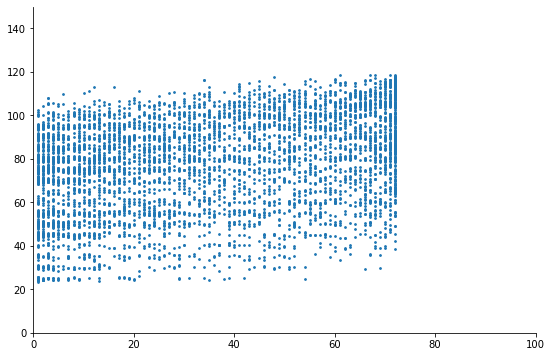

In [111]:
# for customers with internet service
x = telco[telco.InternetService!='No'].tenure
y = telco[telco.InternetService!='No'].MonthlyCharges

plt.scatter(x, y, s=3)
plt.xlim(0,100)
plt.ylim(0,150)

In [113]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.37203919761332516, 1.6186841401674893e-180, 0.05)

In [115]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


(0.0, 60.0)

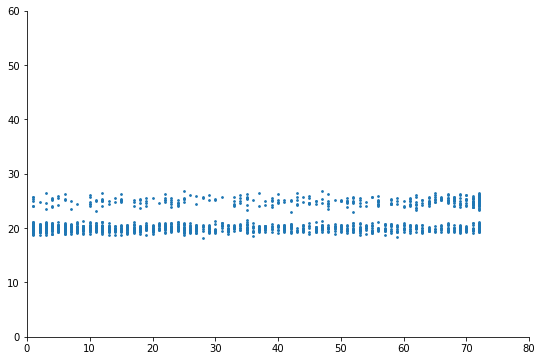

In [119]:
# for customers with internet service
x = telco[telco.InternetService=='No'].tenure
y = telco[telco.InternetService=='No'].MonthlyCharges

plt.scatter(x, y, s=3)
plt.xlim(0,80)
plt.ylim(0,60)

In [120]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.34618773548574805, 4.896604599947503e-44, 0.05)

In [122]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


### Use the employees database.


In [126]:
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url


from env import host, user, password
url = get_db_url(host, user, password, 'employees')

employees = pd.read_sql('SELECT * FROM employees', url)
employees.sample(10)

,emp_no,birth_date,first_name,last_name,gender,hire_date
262422,462398,1955-10-02,Serge,Stamatiou,M,1989-06-30
195779,295755,1963-01-20,Tonny,Kakkar,F,1989-04-02
205167,405143,1960-07-06,Demin,Kroft,M,1990-11-17
227791,427767,1961-09-17,Kien,Picci,M,1986-02-19
46805,56806,1964-04-12,Naraig,Sudbeck,F,1987-06-20
110593,210569,1953-08-19,Abdelwaheb,Gunderson,F,1996-10-27
258667,458643,1962-03-22,Jaques,Pokrovskii,M,1991-05-07
145713,245689,1960-10-14,Billur,Smailagic,M,1995-03-04
37318,47319,1959-11-20,Tuval,Chartres,F,1987-03-21
195953,295929,1960-04-02,Nitsan,Bamford,F,1991-08-05


#### Is there a relationship between how long an employee has been with the company and their salary?

In [129]:
salaries = pd.read_sql('SELECT * FROM salaries', url)
salaries.sample(5)

,emp_no,salary,from_date,to_date
1490881,257077,77850,2000-02-02,2001-02-01
1448395,252540,43640,1998-11-02,1999-11-02
671974,80757,77023,1993-09-11,1994-09-11
2527853,466508,64352,1998-01-23,1999-01-23
1585121,266956,62280,1997-02-10,1998-02-10


In [151]:
hire_date = pd.read_sql('SELECT DISTINCT(emp_no), hire_date FROM employees', url)
hire_date.head()

,emp_no,hire_date
0,10001,1986-06-26
1,10002,1985-11-21
2,10003,1986-08-28
3,10004,1986-12-01
4,10005,1989-09-12


In [163]:
curr_employees = pd.read_sql('SELECT * FROM salaries WHERE to_date > now()', url)
curr_employees.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [199]:
# this table has current salaries and distinct emp_no
es = (hire_date.merge(curr_employees,  
                    how='inner')
                    )
es.sample(5)

,emp_no,hire_date,salary,from_date,to_date
199151,448723,1989-01-03,54198,2002-03-11,9999-01-01
187195,433819,1993-06-09,82832,2002-06-07,9999-01-01
204485,455363,1986-10-16,85376,2001-10-12,9999-01-01
3290,14064,1996-04-09,74843,2002-05-06,9999-01-01
193895,442200,1991-12-18,72701,2001-10-14,9999-01-01


In [203]:
es['tenure'] = datetime.date(2021, 5, 11) - es.hire_date
es.tenure.astype(int)
es.head()

,emp_no,hire_date,salary,from_date,to_date,tenure
0,10001,1986-06-26,88958,2002-06-22,9999-01-01,12738 days
1,10002,1985-11-21,72527,2001-08-02,9999-01-01,12955 days
2,10003,1986-08-28,43311,2001-12-01,9999-01-01,12675 days
3,10004,1986-12-01,74057,2001-11-27,9999-01-01,12580 days
4,10005,1989-09-12,94692,2001-09-09,9999-01-01,11564 days


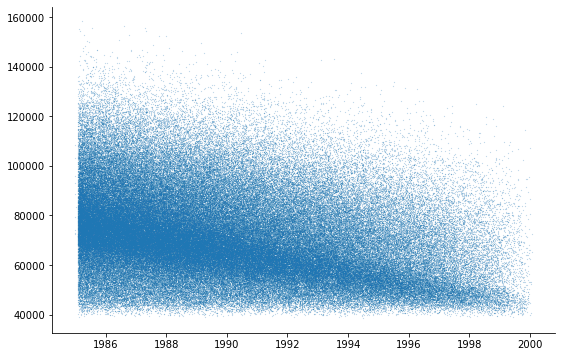

In [213]:
x = es.hire_date
y = es.salary
plt.scatter(x, y, s=.01)
# plt.xlim = 2050
# plt.ylim = 200000

In [192]:
x = es.tenure
y = es.salary
r, p = stats.pearsonr(x, y)
r, p, alpha

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('float64') and dtype('<m8[ns]')

#### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [216]:
s = data('sleepstudy')
s.sample(5)

,Reaction,Days,Subject
179,369.1417,8,372
107,281.5648,6,349
119,394.4872,8,350
21,199.0539,0,310
72,276.2012,1,334


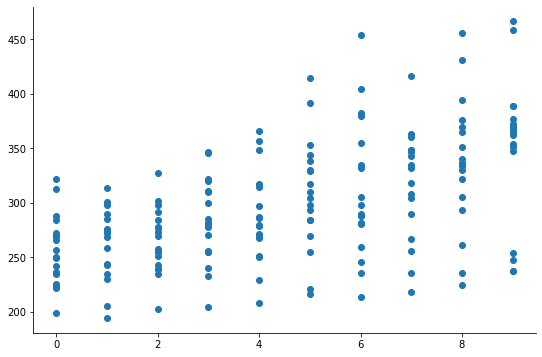

In [217]:
x = s.Days
y = s.Reaction
plt.scatter(x, y)

In [218]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.5352302262650253, 9.894096322214812e-15, 0.05)

In [219]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation
